Having produced results from the predictions we now take another look to see how they compare to the observed ones and what can we interpret and expect in the next years

In [1016]:
import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


path = './Data/Pickle Files/Processed_Dataframes/'

In [1017]:
#!pip install --upgrade xarray==2022.3.0

In [1018]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

In [1019]:
feature_df = pd.read_csv(path+'features.csv')

In [1020]:
disease_df = pd.read_csv(path+'disease_Proc_df.csv')

In [1021]:
df = pd.merge(feature_df, disease_df, on=['Year', 'State'])

In [1022]:
# Create a dictionary to map column names to cancer types
column_map = {
    'CAN10_1': 'pharynx cancer',
    'CAN11_1': 'prostate cancer',
    'CAN5_1': 'breast cancer',
    'CAN6_1': 'cervix cancer',
    'CAN7_1': 'colon cancer',
    'CAN8_1': 'lung cancer',
    'CAN9_1': 'melanoma'
}

# Rename the columns using the column_map dictionary
df = df.rename(columns=column_map)

In [1023]:
forecast = pd.read_csv('C:/Users/jlouv/ABA-Spring2023/'+'forecast_df.csv.xls')

In [1024]:
# Create a dictionary to map column names to cancer types
column_map = {
    'CAN10_1': 'pharynx cancer',
    'CAN11_1': 'prostate cancer',
    'CAN5_1': 'breast cancer',
    'CAN6_1': 'cervix cancer',
    'CAN7_1': 'colon cancer',
    'CAN8_1': 'lung cancer',
    'CAN9_1': 'melanoma'
}

# Rename the columns using the column_map dictionary
forecast = forecast.rename(columns=column_map)

In [1025]:
forecast

pharynx cancer  prostate cancer  breast cancer  cervix cancer  \
0         14.342899       140.807851     138.303567       9.944254   
1         14.282553       141.525485     138.743992      10.168702   
2         14.215727       142.175601     139.172920      10.387069   
3         14.145401       142.869668     139.596948      10.604897   
4         14.072078       143.560939     140.018105      10.820991   
..              ...              ...            ...            ...   
229       11.168841       132.489107     126.907410       8.048310   
230       11.066787       133.910475     127.493213       8.097746   
231       10.964734       135.331844     128.079016       8.147183   
232       10.862681       136.753213     128.664820       8.196619   
233       10.760628       138.174582     129.250623       8.246056   

     colon cancer  lung cancer   melanoma  Year State  
0       47.879403    71.336399  23.937588  2020    AL  
1       48.195885    70.770850  23.625560  2021    AL  
2       48.500011    70.201898  23.344519  2022    AL  
3       48.804458    69.633616  23.056646  2023    AL  
4       49.105518    69.063639  22.755349  2024    AL  
..            ...          ...        ...   ...   ...  
229     35.863875    45.188061  26.431488  2021    WY  
230     35.768500    44.759081  26.466984  2022    WY  
231     35.673125    44.330101  26.502480  2023    WY  
232     35.577750    43.901122  26.537976  2024    WY  
233     35.482375    43.472142  26.573472  2025    WY  

[234 rows x 9 columns]

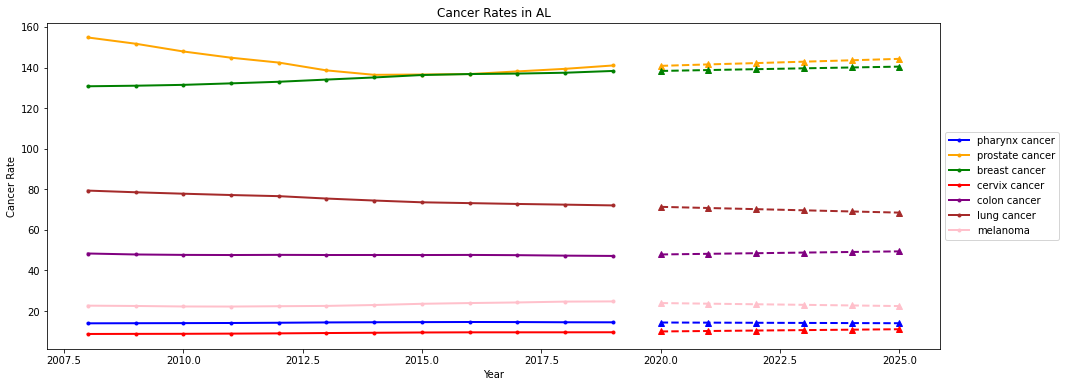

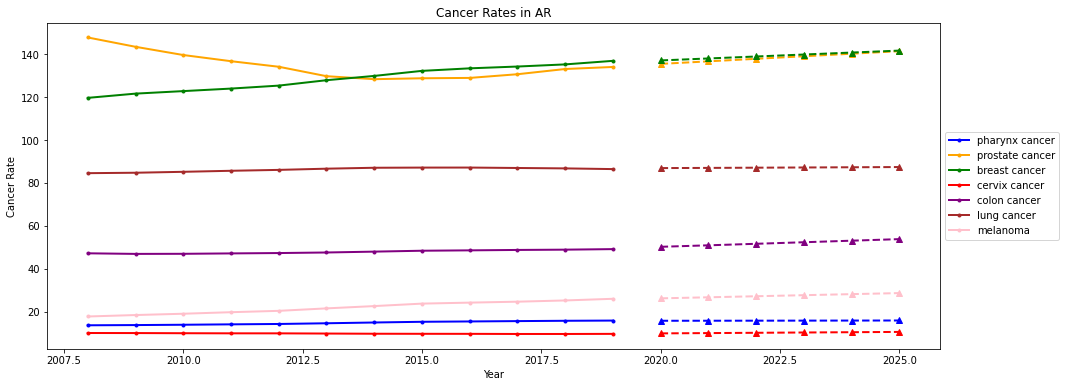

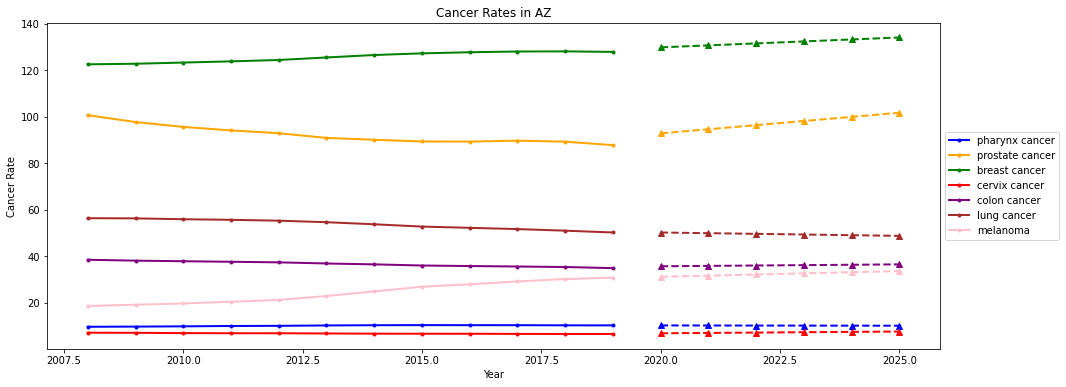

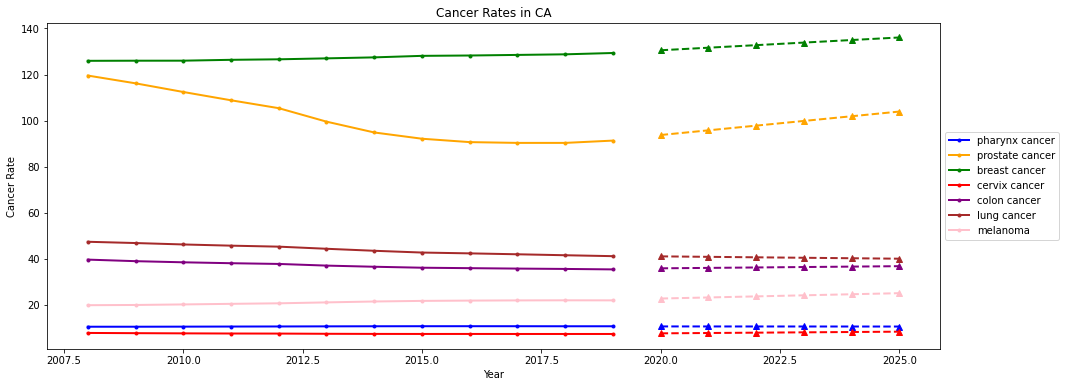

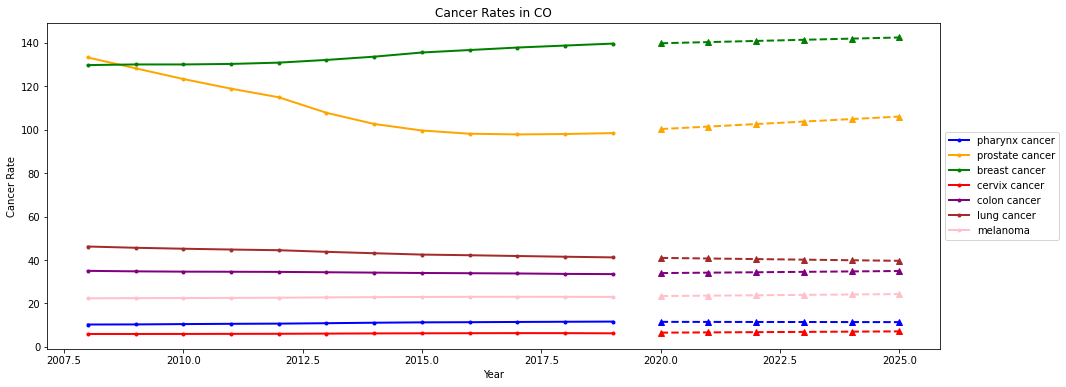

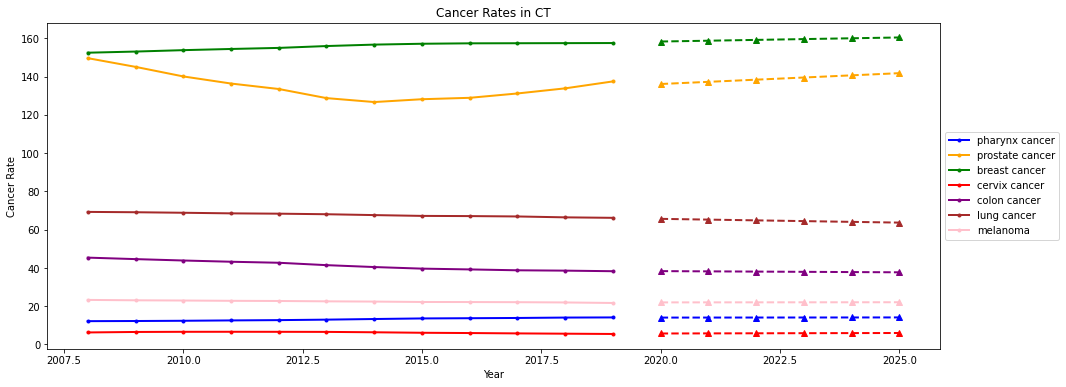

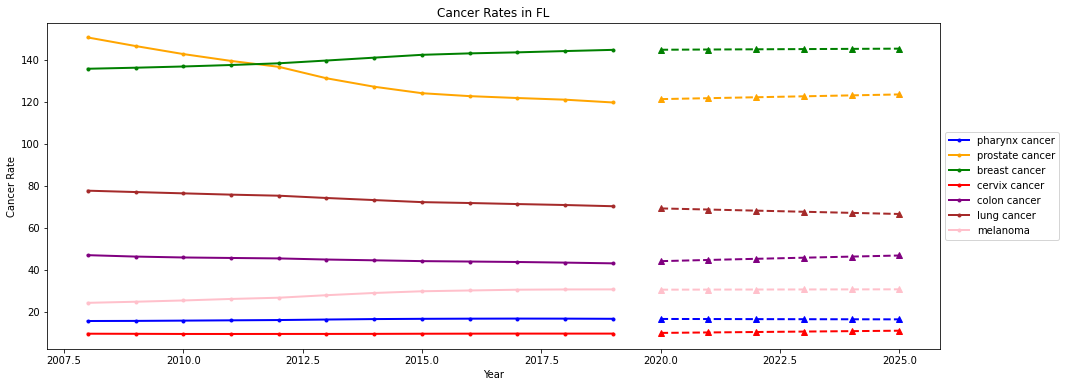

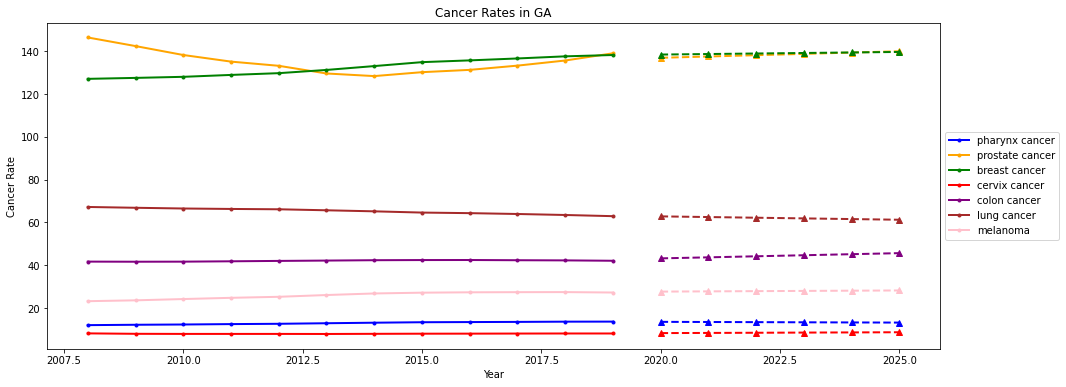

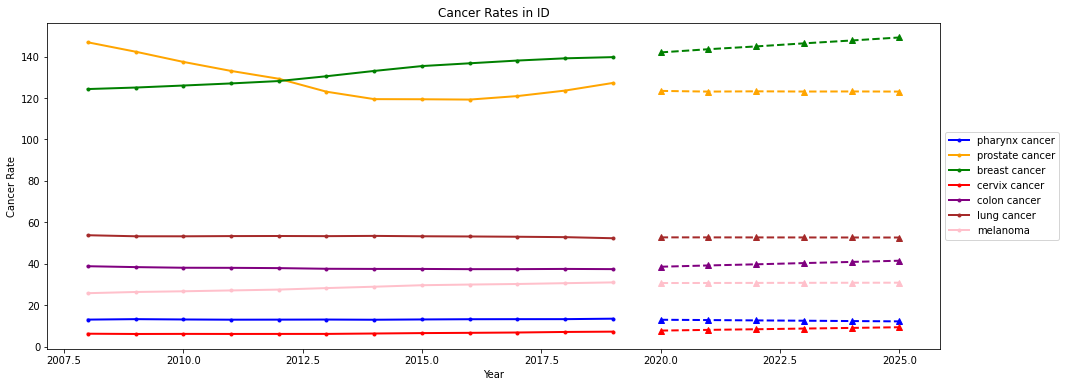

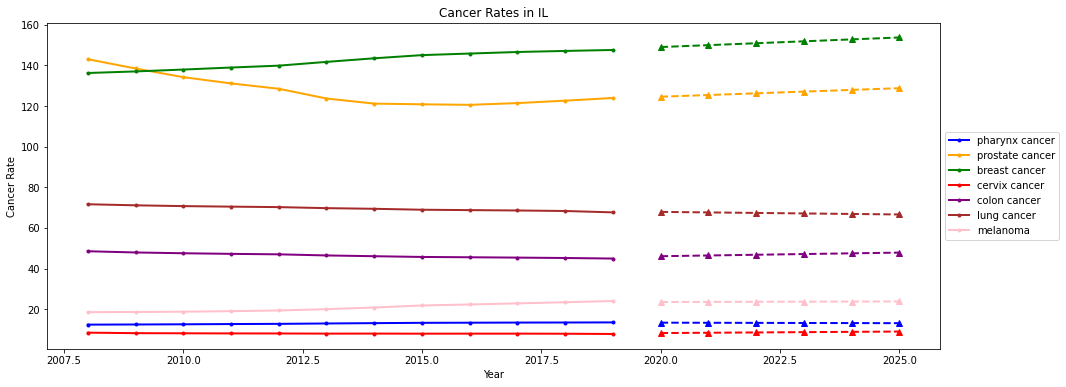

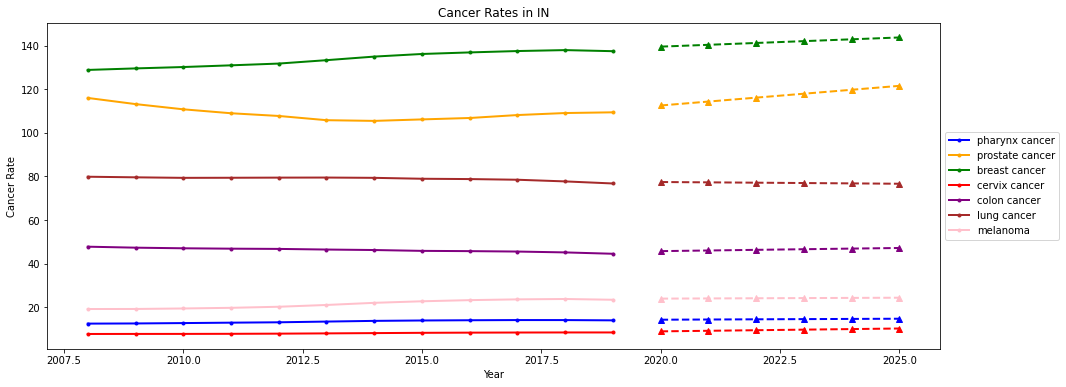

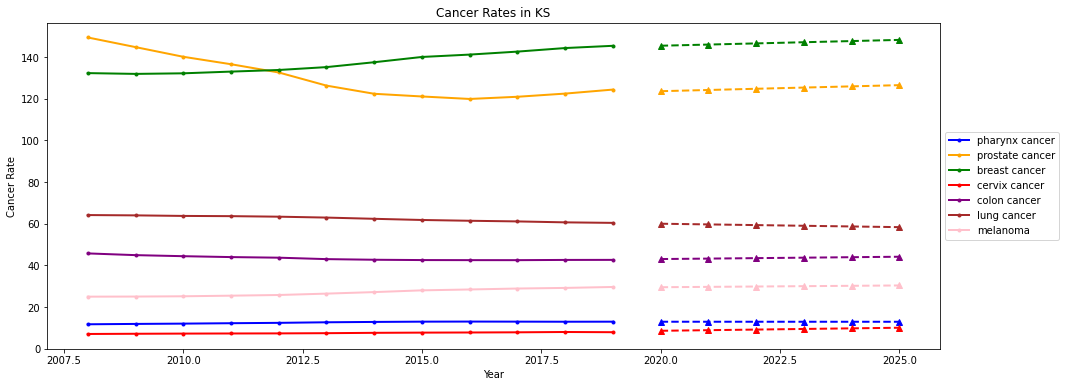

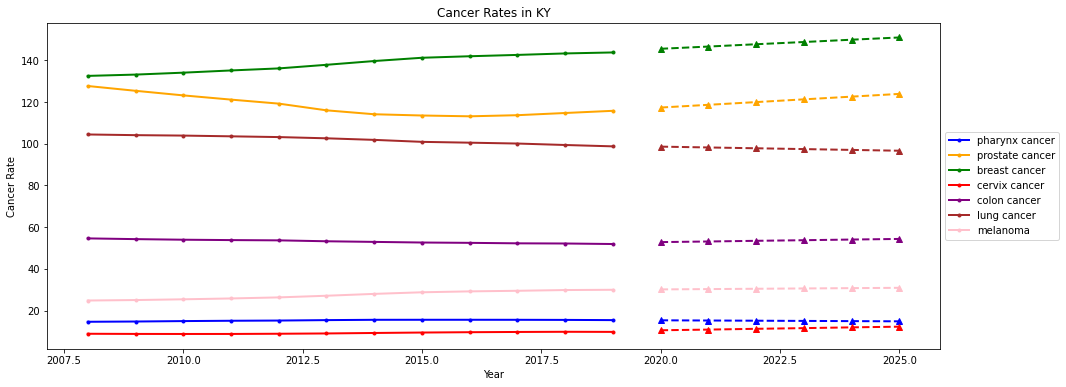

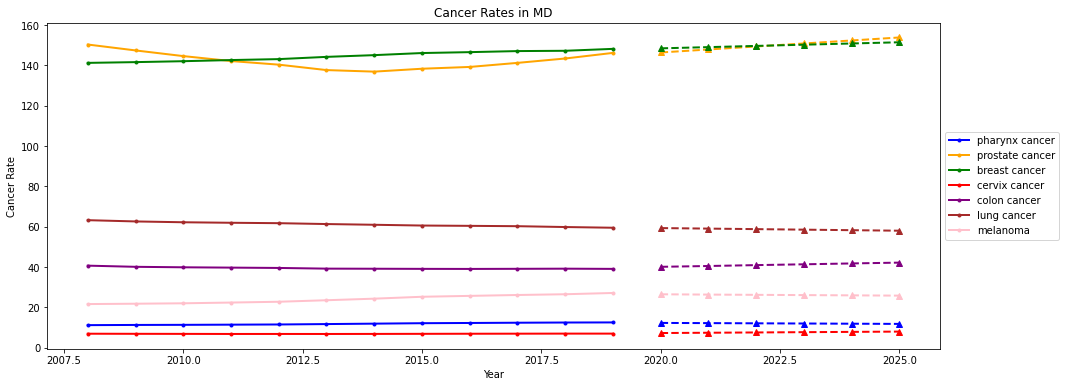

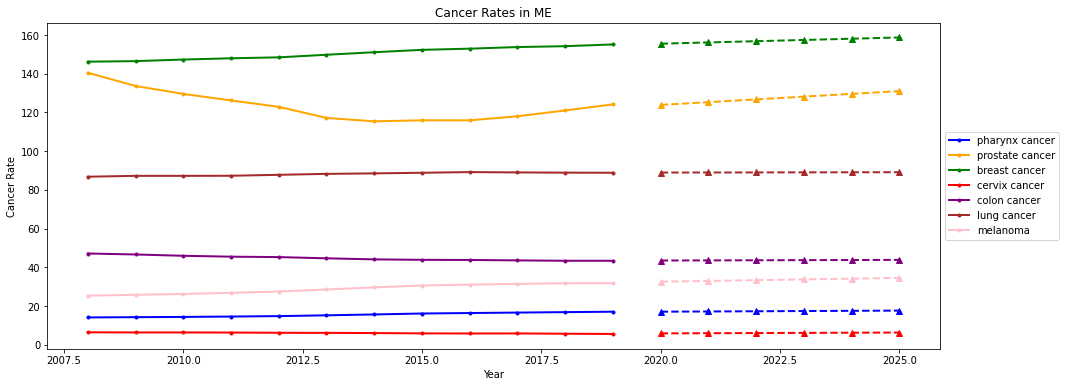

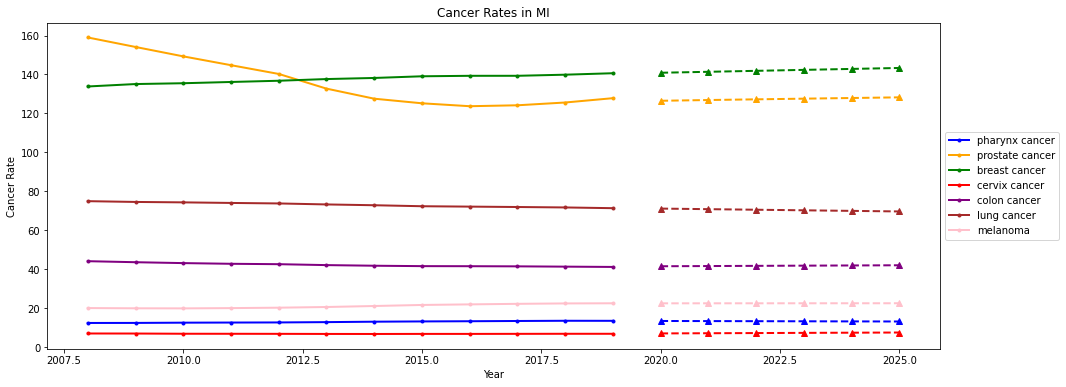

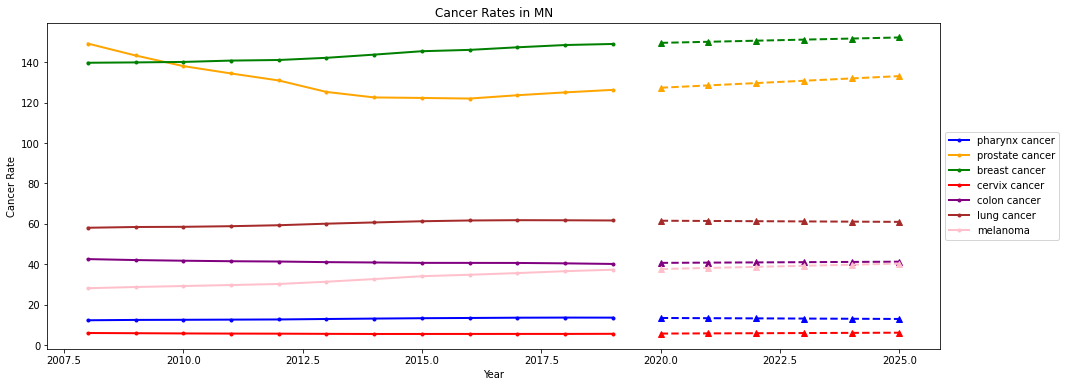

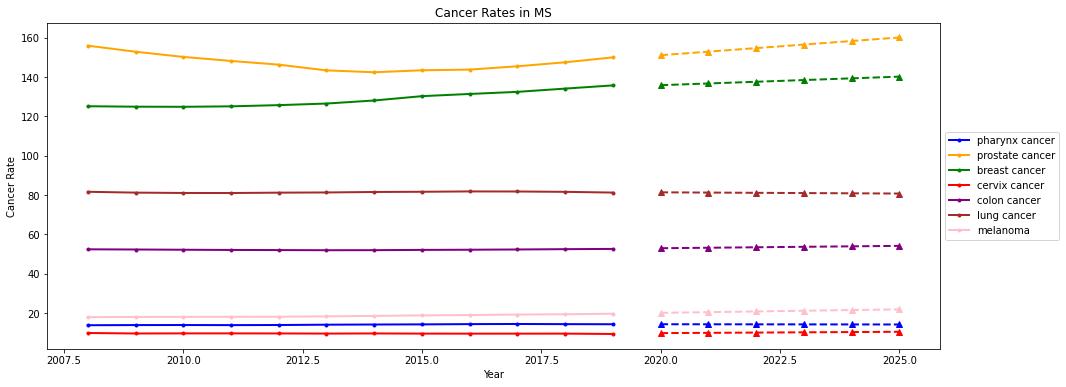

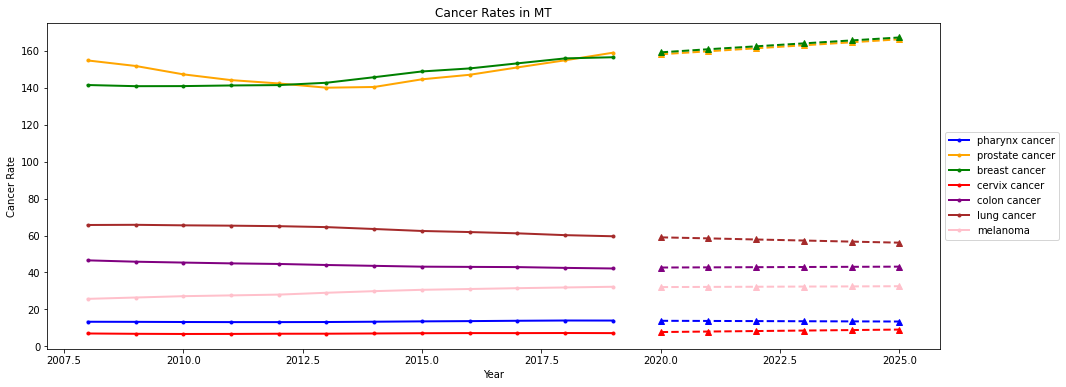

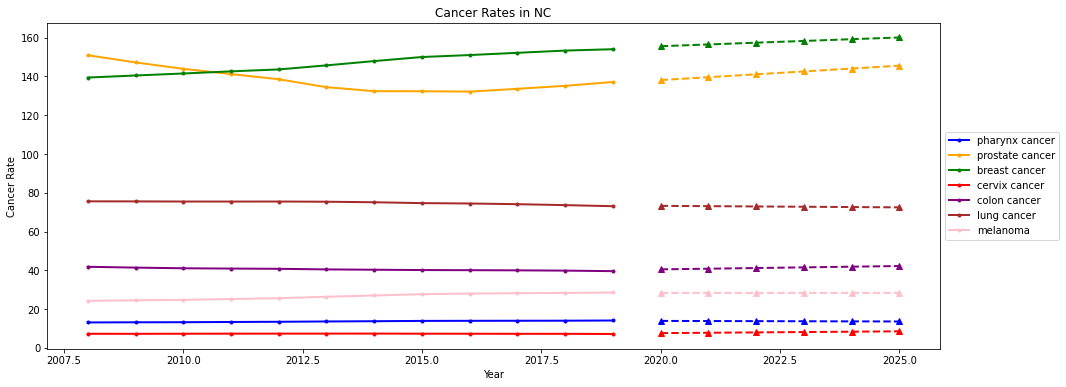

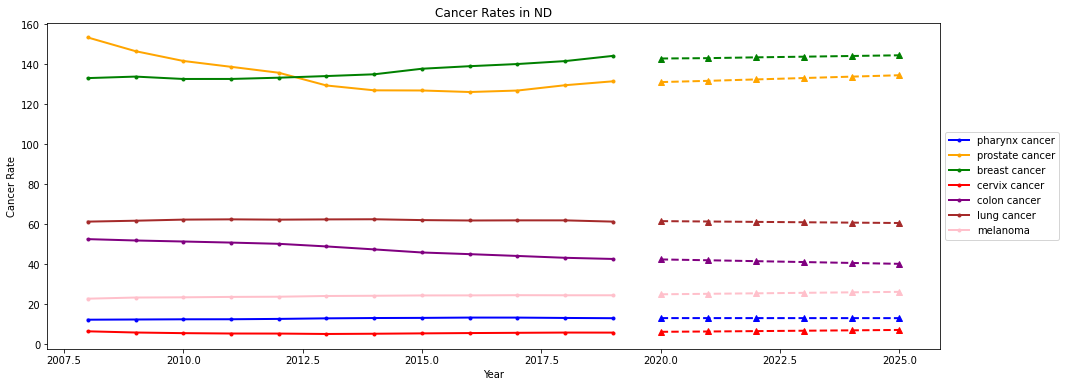

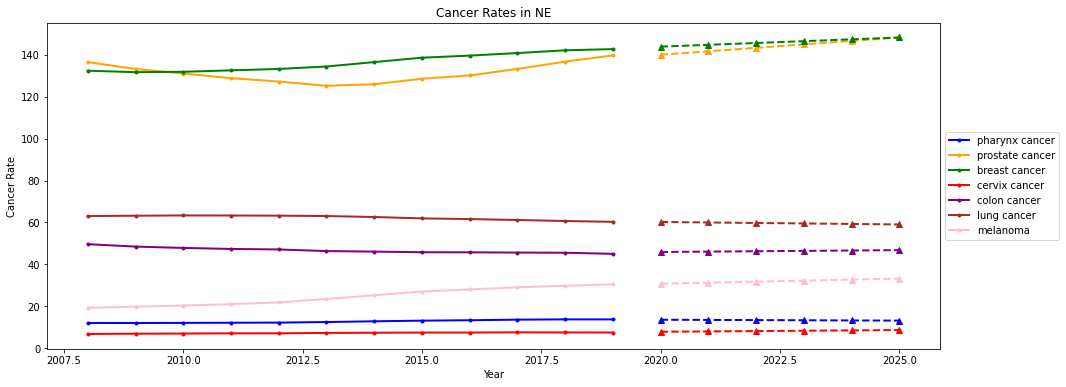

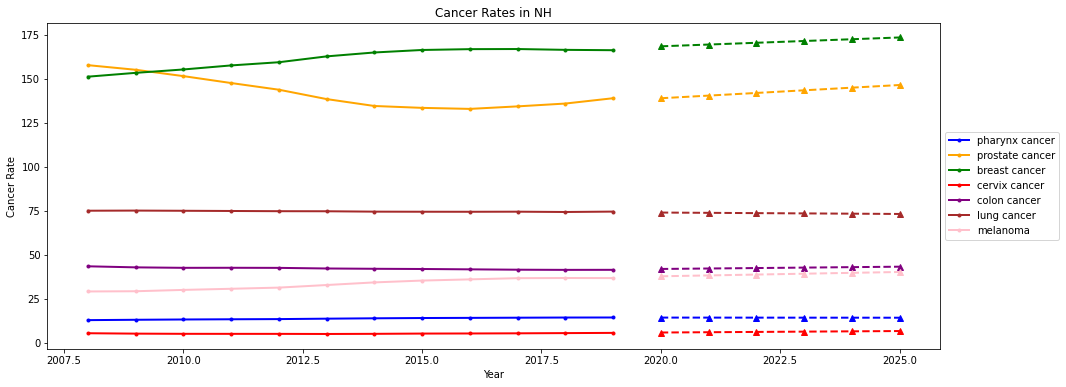

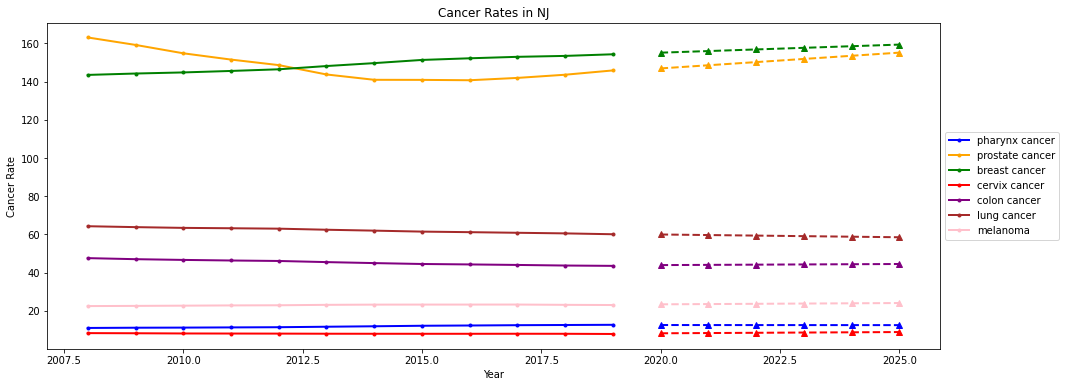

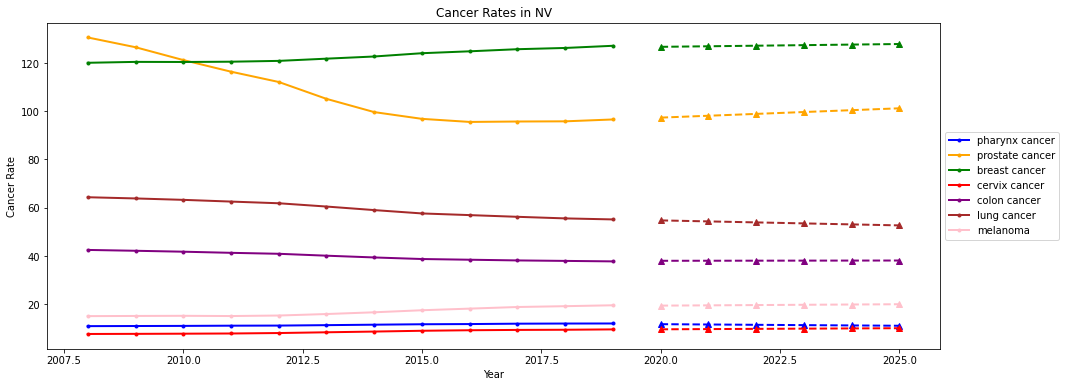

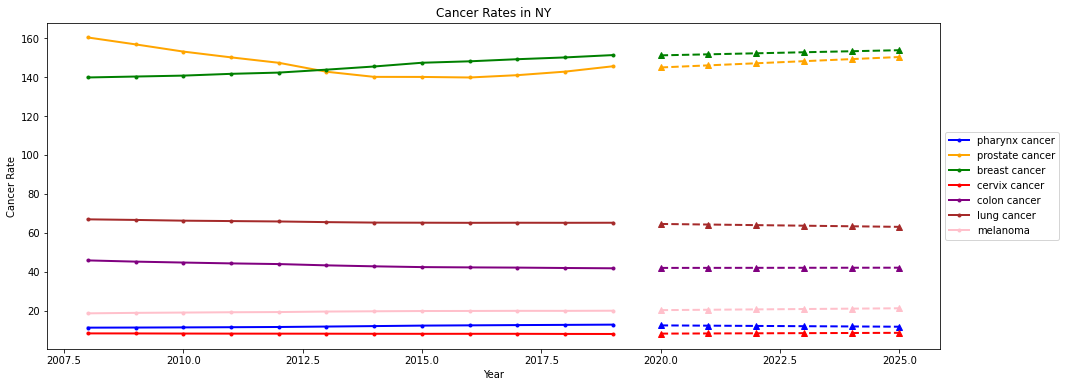

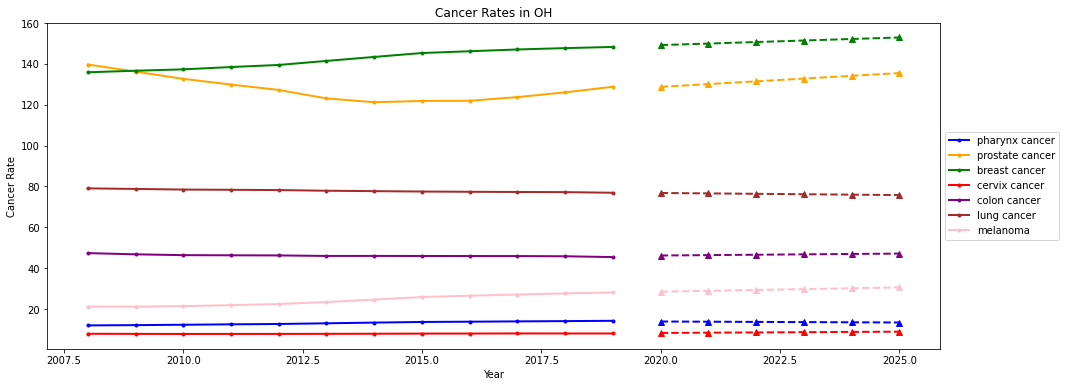

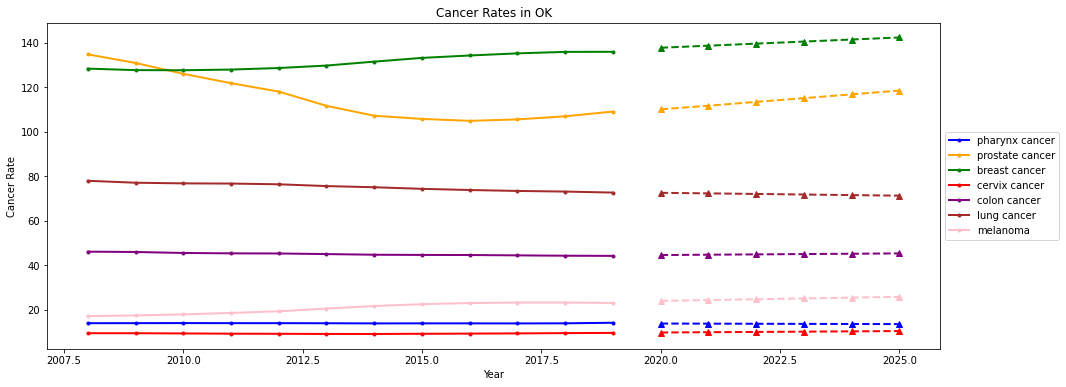

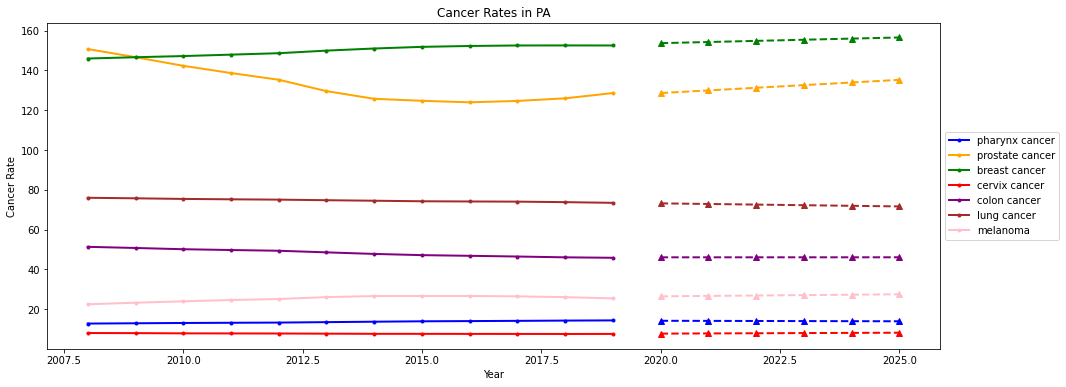

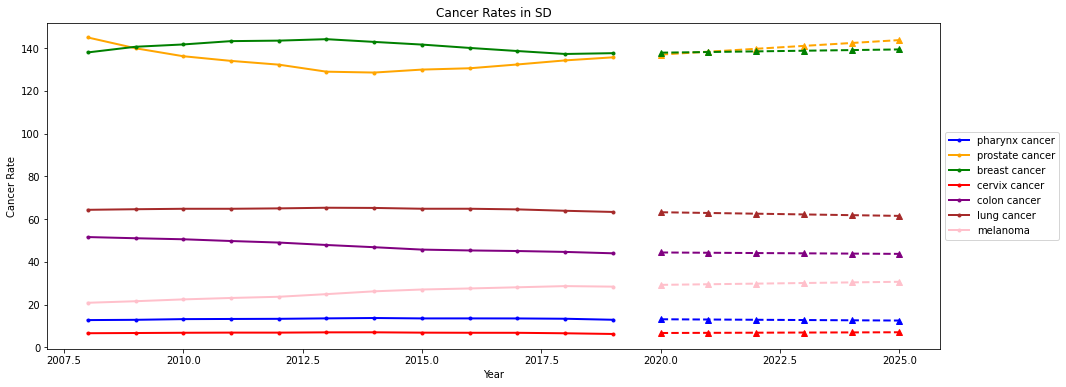

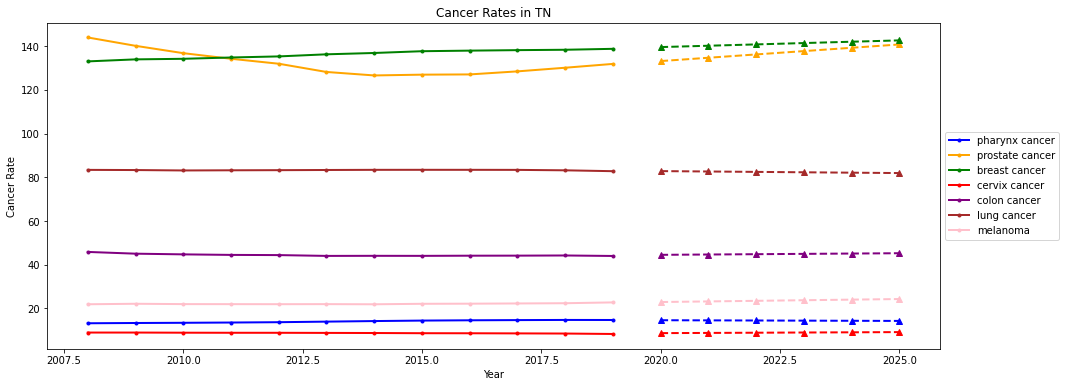

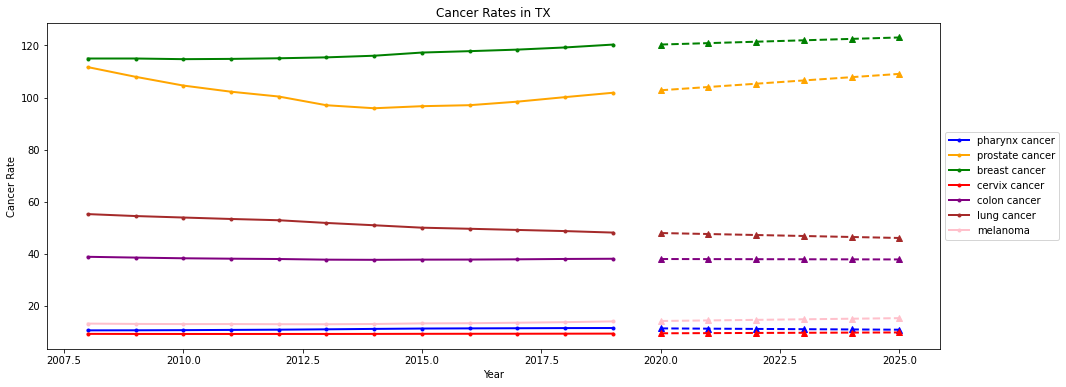

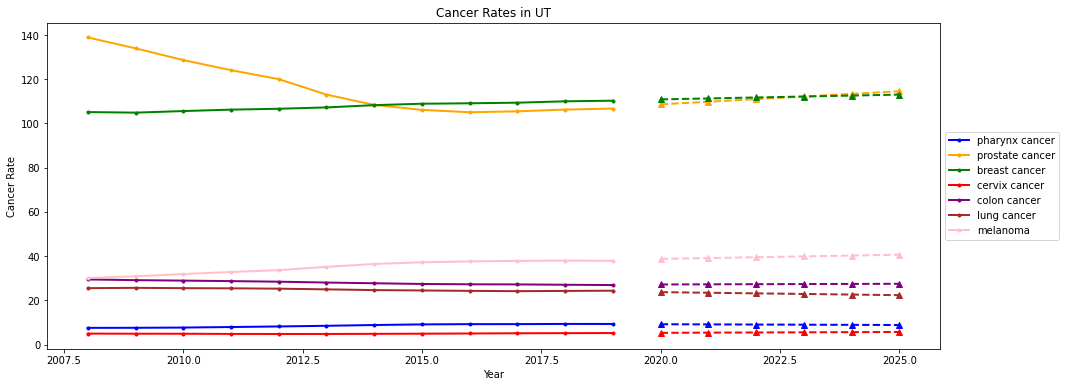

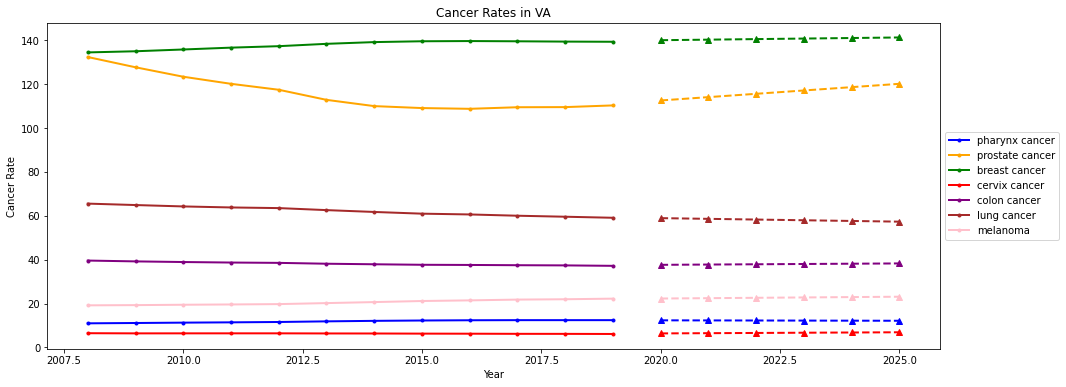

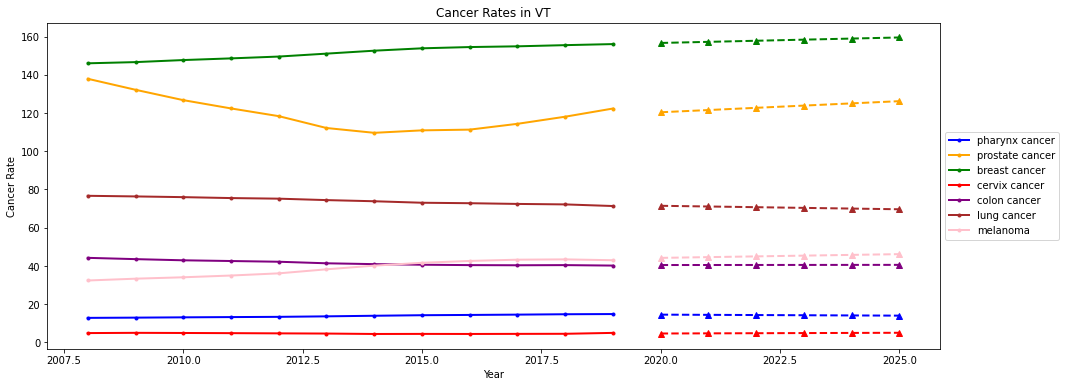

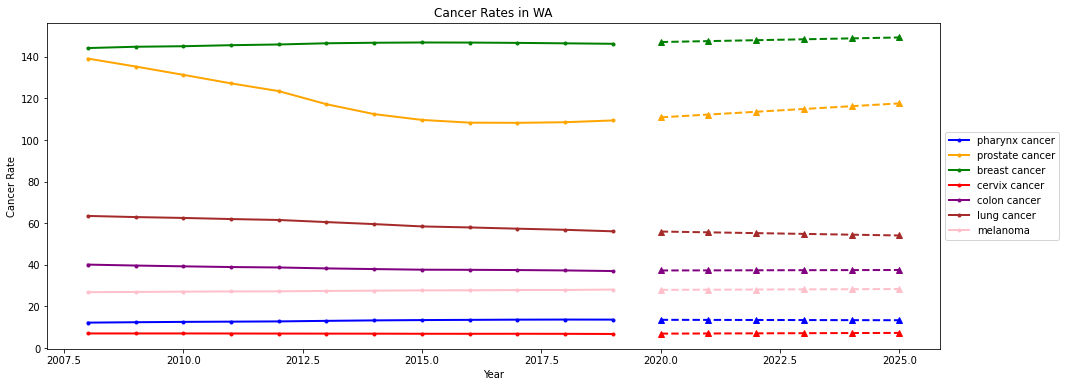

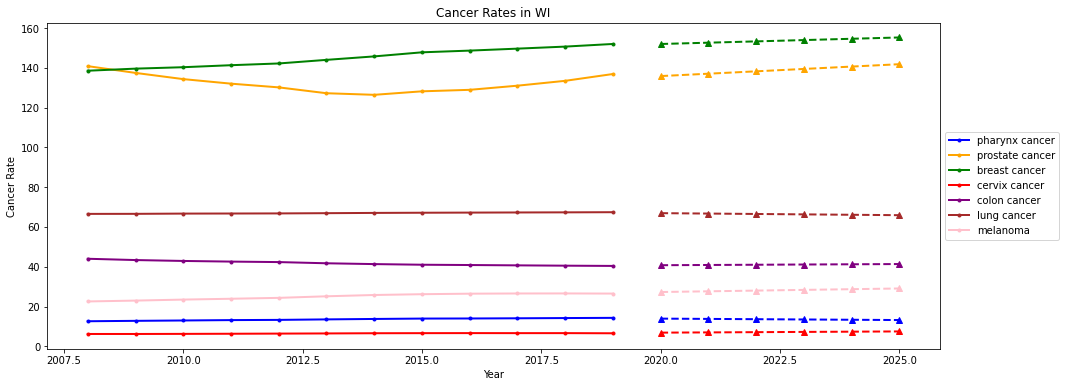

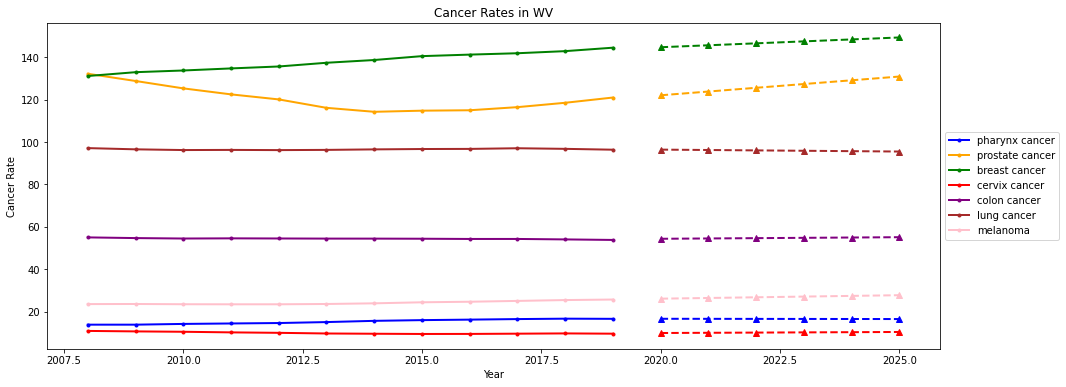

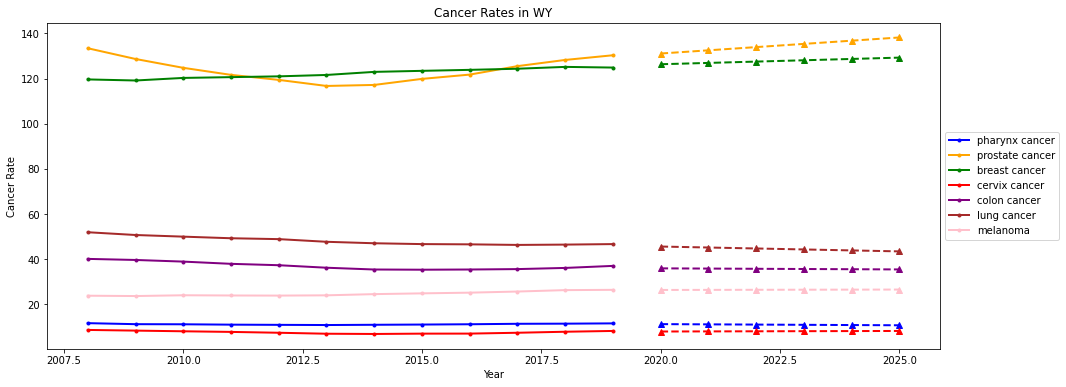

In [1026]:
# using the code below to check plotwise the movement of each cancer for each state that is predicted and including what is observed

# select the years to plot
obs_years = range(2008, 2020)
pred_years = range(2020, 2026)



color_map = {'pharynx cancer': 'blue', 'prostate cancer': 'orange', 'breast cancer': 'green', 'cervix cancer': 'red', 
             'colon cancer': 'purple', 'lung cancer': 'brown', 'melanoma': 'pink'}

# iterate over each state
for state in df['State'].unique():
    # create a new figure for each state
    plt.figure(figsize=(16, 6))
    
    # plot observed data for each cancer type
    for cancer_type in cancer_types:
        plt.plot(df[(df['State'] == state) & (df['Year'].isin(obs_years))]['Year'],
                 df[(df['State'] == state) & (df['Year'].isin(obs_years))][cancer_type],
                 label=cancer_type, marker='.', linewidth=2, color=color_map[cancer_type])
    
    # plot predicted data for each cancer type
    for cancer_type2 in cancer_types:
        plt.plot(forecast[(forecast['State'] == state) & (forecast['Year'].isin(pred_years))]['Year'],
                 forecast[(forecast['State'] == state) & (forecast['Year'].isin(pred_years))][cancer_type2],
                 label=None, marker='^', linestyle='--', linewidth=2, color=color_map[cancer_type2])
    
    # add title and axis labels
    plt.title(f"Cancer Rates in {state}")
    plt.xlabel("Year")
    plt.ylabel("Cancer Rate")
    
    # add legend and show plot
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


Most states showcase a predicted increased breast (mostly slight increase) and prostate cancer rates, reduced or flattened lung cancer rates and almost overall flattened cervix and pharynx rates. Lastly melanoma is seen to increase more relative to the rest of the cancers per state

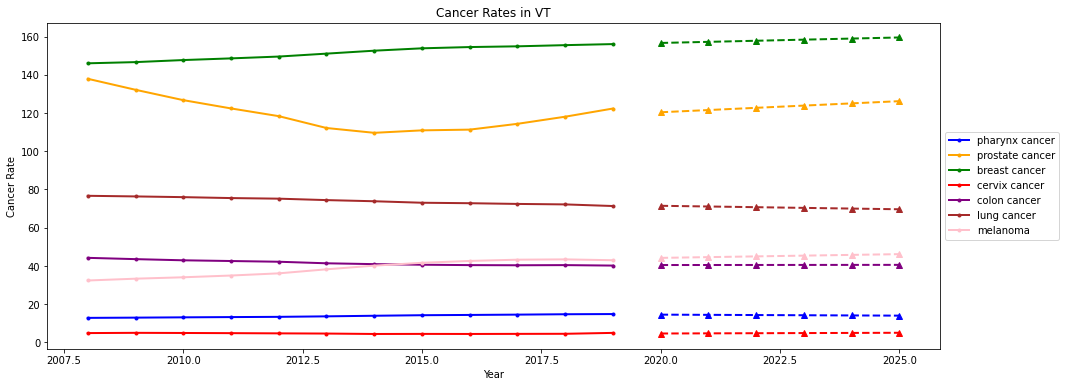

In [1027]:
# Vermont all cancers plot 

# select the years to plot
obs_years = range(2008, 2020)
pred_years = range(2020, 2026)



color_m = {'melanoma': 'pink'}

# iterate over each state
for state in ['VT']:
    # create a new figure for each state
    plt.figure(figsize=(16, 6))
    
    # plot observed data for each cancer type
    for cancer_type in cancer_types:
        plt.plot(df[(df['State'] == state) & (df['Year'].isin(obs_years))]['Year'],
                 df[(df['State'] == state) & (df['Year'].isin(obs_years))][cancer_type],
                 label=cancer_type, marker='.', linewidth=2, color=color_map[cancer_type])
    
    # plot predicted data for each cancer type
    for cancer_type2 in cancer_types:
        plt.plot(forecast[(forecast['State'] == state) & (forecast['Year'].isin(pred_years))]['Year'],
                 forecast[(forecast['State'] == state) & (forecast['Year'].isin(pred_years))][cancer_type2],
                 label=None, marker='^', linestyle='--', linewidth=2, color=color_map[cancer_type2])
    
    # add title and axis labels
    plt.title(f"Cancer Rates in {state}")
    plt.xlabel("Year")
    plt.ylabel("Cancer Rate")
    
    # add legend and show plot
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

Vermont looks to have the highest increase in cases for melanoma out of all the states and the prostate cancer as well while it has decreasing predicted rates for lung cancer

In [1028]:
def cancer_rates_usa_map_all_states(data, cancer_type):
    fig = go.Figure(data=go.Choropleth(
        locations=data['State'],
        z=data[cancer_type],
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='Cancer Rate'))
    fig.update_layout(title_text='Cancer Rates by State for {}'.format(cancer_type),
                      geo_scope='usa')
    fig.show()


In [1029]:
# making a merged dataframe including the predictions and the observations for different cancers
observed_data = df[['pharynx cancer','prostate cancer','breast cancer','cervix cancer',
                    'colon cancer','lung cancer','melanoma', 'Year', 'State']]

years = range(2020, 2026) # this can change to include the forecasted data, but here it is for this range (if you change this, the K might change)

# filter the data to include only the selected years
pred = pred[pred['Year'].isin(years)]
pred.reset_index(inplace=True, drop=True)



# concatenate the dataframes vertically
all_data = pd.concat([observed_data, forecast], axis=0)

# reset the index
all_data.reset_index(inplace=True, drop=True)



In [1030]:
#map for the predicted values

for cancer in cancer_types:
    cancer_rates_usa_map_all_states(pred, cancer)

pharynx and prostate cancer seem to be similar, cervix seems to mostly be worsening (more cases), breast and colon look to have varying results (some states worsen some get better results) and lung is all in all improving and melanoma mixed again

In [1031]:
# dynamic mapping for all the years (observed and predicted) and for all the types of cancer
color_scale = px.colors.diverging.RdYlGn[::-1]


labels = {'breast cancer': 'breast cancer',
          'lung cancer': 'lung cancer',
          'prostate cancer': 'prostate cancer',
          'colon cancer': 'colon cancer',
          'melanoma': 'melanoma',
         'pharynx cancer': 'pharynx cancer',
         'cervix cancer': 'cervix cancer'}

['pharynx cancer','prostate cancer','breast cancer','cervix cancer','colon cancer','lung cancer','melanoma']



for i in cancer_types:
    # Create choropleth maps for each year for each cancer
    fig = px.choropleth(all_data, 
                    locations='State',
                    locationmode='USA-states',
                    color=i,
                    color_continuous_scale=color_scale,  # Use the custom diverging color scale with inverted colors
                    range_color=(all_data[i].min(), all_data[i].max()),
                    hover_data={'State': True, 'Year': True, i: True},
                    scope='usa',
                    labels={cancer_type: labels[i]},
                    title='Dynamic US Map - {}'.format(i),
                    animation_frame='Year',  # Specify the column to animate
                    )

    # Update map layout
    fig.update_geos(projection_type='albers usa')
    fig.update_traces(marker_line_color='rgb(255,255,255)', marker_line_width=2)

    # Set animation settings
    animation_settings = dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)

    # Update layout to include animation settings
    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                            method='animate',
                                            args=[None, animation_settings])])])

    # Show the plot
    fig.show()


Next we cluster to see if different states behave in the same way as they did in the observed part (exploratory)

In order to compare it with the exploratory part, the K will remain the same (even though in reality you would search for the right K again)

In [1032]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# select the years to include
years = range(2020, 2026)

# filter the data to include only the selected years
all_data = all_data[all_data['Year'].isin(years)]

# create a dictionary of the cancer rates for each cancer type
cancer_dict = {}
for cancer_type in cancer_types:
    cancer_data = all_data.pivot(index='State', columns='Year')[cancer_type].fillna(0)
    cancer_data_std = (cancer_data - cancer_data.mean()) / cancer_data.std()
    kmeans = KMeans(n_clusters=4, random_state=0).fit(cancer_data_std)
    cancer_data['Cluster'] = kmeans.labels_
    cancer_dict[cancer_type] = cancer_data

    # create a line plot with cluster colors for each cancer type
    fig = go.Figure()
    for i in range(4):
        cluster_data = cancer_data[cancer_data['Cluster'] == i].T
        cluster_data.columns = cluster_data.iloc[0]
        cluster_data = cluster_data[1:]
        fig.add_trace(go.Scatter(x=cluster_data.index, y=cluster_data.mean(axis=1),
                                  name='Cluster {}'.format(i), line=dict(color=px.colors.qualitative.Pastel[i])))
    fig.update_layout(title='Cancer Rates over Time for {}'.format(cancer_type),
                      xaxis_title='Year',
                      yaxis_title='Rate per 100,000')
    fig.show()

    # plot the clusters for each cancer type
    fig = px.choropleth(locations=cancer_data.index,
                        locationmode='USA-states',
                        color=cancer_data['Cluster'],
                        scope='usa',
                        title='K-Means Clustering for {}'.format(cancer_type),
                        color_continuous_scale=px.colors.sequential.Rainbow)
    fig.show()


We observe some states changing clusters (not in a very drastic way but lets check some results)

For example:

For the pharynx cancer
California, Nevada and the neighbouring states fell to the smallest cluster (in cases) where Utah already was

For the breast cancer
New York "fell" a cluster (meaning it was in the highest observed values cluster and fell into the second highest in values cluster in the predictions) while Idaho went up a cluster


For the lung cancer

Wisconsin went "up" one while Arizone fell one 

For melanoma

States that were already high in cluster remained (like Vermont) and states such as Arizona went up by one

In [1033]:
forecast

pharynx cancer  prostate cancer  breast cancer  cervix cancer  \
0         14.342899       140.807851     138.303567       9.944254   
1         14.282553       141.525485     138.743992      10.168702   
2         14.215727       142.175601     139.172920      10.387069   
3         14.145401       142.869668     139.596948      10.604897   
4         14.072078       143.560939     140.018105      10.820991   
..              ...              ...            ...            ...   
229       11.168841       132.489107     126.907410       8.048310   
230       11.066787       133.910475     127.493213       8.097746   
231       10.964734       135.331844     128.079016       8.147183   
232       10.862681       136.753213     128.664820       8.196619   
233       10.760628       138.174582     129.250623       8.246056   

     colon cancer  lung cancer   melanoma  Year State  
0       47.879403    71.336399  23.937588  2020    AL  
1       48.195885    70.770850  23.625560  2021    AL  
2       48.500011    70.201898  23.344519  2022    AL  
3       48.804458    69.633616  23.056646  2023    AL  
4       49.105518    69.063639  22.755349  2024    AL  
..            ...          ...        ...   ...   ...  
229     35.863875    45.188061  26.431488  2021    WY  
230     35.768500    44.759081  26.466984  2022    WY  
231     35.673125    44.330101  26.502480  2023    WY  
232     35.577750    43.901122  26.537976  2024    WY  
233     35.482375    43.472142  26.573472  2025    WY  

[234 rows x 9 columns]

In [1034]:
# Calculate the % delta from 2020 to 2025 for each cancer type


for cancer_type in cancer_types:
    forecast[cancer_type + '_delta'] = ((forecast[cancer_type] - forecast[cancer_type].loc[forecast['Year'] == 2020].values[0]) / 
                                         forecast[cancer_type].loc[forecast['Year'] == 2020].values[0]) * 100
    
    

In [1035]:
# percentage change in the predictions, how the predictions 
#change from 2020 to 2025 (looking at which states are predicted to improve or worsen for each cancer)


for cancer_type in cancer_types:
    fig = px.choropleth(forecast, 
                        locations='State', 
                        locationmode='USA-states', 
                        color=cancer_type + '_delta',
                        hover_data=['State', 'Year', cancer_type + '_delta'],
                        color_continuous_scale='RdYlGn_r',  # Use the red-yellow-green color scale
                        range_color=(-100, 100),  # Set the color scale range from -100% to 100%
                        title=cancer_type + ' % change from 2020 to 2025'
                       )
    fig.update_geos(projection_type='albers usa')  # Set the map projection type to 'albers usa'
    fig.show()


some states seem to increase their cases a lot over the period of the predicted years (like melanoma looking at Vermont)
and others look to be better off (like California and lung cancer)

All in all these data and predictions pave the road for the legislators and health officials can look at the results and have an inclination and an idea about how each cancer will behave per state, which pollutants may be involed most in some of them and group the states per behaviour of different cancers